### Start from here


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:

# Load the data
data = pd.read_csv("C:\\Users\\Mohammad\\Desktop\\Uni\\Uni work\\Year 4\\Term 7, fall 2022\\CMPE 460 Deep Learning\\project\\CMPE-460-Project\\dataset\\cars.csv",encoding='iso-8859-1')



# drop rows where the price is less than 500
data = data[data['price'] >= 500]




# # Drop the totalPrice column
# data['doornumber'] = data['doornumber'].replace({'four':'4','two':'2'}, regex=True)
# # Drop rows with missing or empty values in the "Doors" column
# data = data[data['doornumber'].str.strip() !='']
# data['doornumber'] = data['doornumber'].astype(int)

In [4]:
def check_missing_values(dataframe):
    missing_values = dataframe.isnull().any()
    if missing_values.any():
        print("Missing values in columns:")
        print(missing_values[missing_values==True])
    else:
        print("No missing values.")

check_missing_values(data)


No missing values.


In [5]:
data

,car_ID,Manufacturer,Model,symboling,Fuel type,aspiration,doornumber,Category,Drive wheels,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,201,volvo,145e (sw),-1,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
199,202,volvo,144ea,-1,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
200,203,volvo,244dl,-1,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
201,204,volvo,246,-1,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
if 'Manufacturer' in data.columns:
    data = data.drop('Manufacturer', axis=1)
else:
    print("Manufacturer column not found")

if 'Model ' in data.columns:
    data = data.drop('Model ', axis=1)
else:
    print("Model  column not found")


In [7]:
data

,car_ID,symboling,Fuel type,aspiration,doornumber,Category,Drive wheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
199,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
200,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
201,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
# Define the list of categorical columns
categorical_cols = ['symboling', 'Fuel type', 'aspiration', 'doornumber', 'Category', 'Drive wheels', 'enginelocation', 'enginetype', 'Cylinders', 'fuelsystem']

# Create the main array with car_ID column
main_array = np.array(data['car_ID']).reshape(-1,1)

# Iterate through columns in the dataframe
for col in data.columns:
    # Check if the column is in the list of categorical columns
    if col in categorical_cols:
        # Perform one-hot encoding on the column
        temp = np.array(pd.get_dummies(data[col]))
    else:
        # Otherwise, reshape the column
        temp = np.array(data[col]).reshape(-1,1)
    # Stack the column with the main array
    main_array = np.hstack((main_array, temp))

# Remove the car_ID column
main_array = main_array[:, 2:]

# Display the array as a dataframe
pd.DataFrame(main_array)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
199,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
201,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [9]:
# Define the features and labels
X = main_array[:, :-1]
y = main_array[:, -1].reshape(-1, 1)

In [10]:
for i, val in enumerate(X):
    for j, value in enumerate(val):
        if isinstance(value, str):
            print("string value found in X at index [{}, {}]: {}".format(i, j, value))


In [11]:
xScaler = StandardScaler()
yScaler = StandardScaler()

X_scaled = xScaler.fit_transform(X)
Y_scaled = yScaler.fit_transform(y)

print("Shape of X_data: {}".format(X.shape))
print("Shape of y_data: {}".format(y.shape))
print("==========X_data after rescaling===============")
print(pd.DataFrame(X_scaled).head())
print("==========y_data after rescaling===============")
print(Y_scaled.ravel())



Shape of X_data: (203, 57)
Shape of y_data: (203, 1)
==========X_data after rescaling===============
         0         1         2         3         4         5        6   \
0 -0.122474 -0.348636 -0.694083 -0.602010 -0.424538  2.553139 -0.33059   
1 -0.122474 -0.348636 -0.694083 -0.602010 -0.424538  2.553139 -0.33059   
2 -0.122474 -0.348636 -0.694083  1.661102 -0.424538 -0.391675 -0.33059   
3 -0.122474 -0.348636 -0.694083 -0.602010  2.355501 -0.391675 -0.33059   
4 -0.122474 -0.348636 -0.694083 -0.602010  2.355501 -0.391675 -0.33059   

        7         8         9   ...        47        48       49        50  \
0  0.33059  0.472114 -0.472114  ...  1.076835 -0.215387 -0.07036  0.530087   
1  0.33059  0.472114 -0.472114  ...  1.076835 -0.215387 -0.07036  0.530087   
2  0.33059  0.472114 -0.472114  ...  1.076835 -0.215387 -0.07036 -2.396250   
3  0.33059  0.472114 -0.472114  ...  1.076835 -0.215387 -0.07036 -0.507095   
4  0.33059  0.472114 -0.472114  ...  1.076835 -0.215387 -0.07036

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, shuffle=False)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (182, 57)
Shape of X_test: (21, 57)
Shape of y_train: (182, 1)
Shape of y_test: (21, 1)


In [13]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(None, 57)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 8)           464       
                                                                 
 dense_1 (Dense)             (None, None, 4)           36        
                                                                 
 dense_2 (Dense)             (None, None, 1)           5         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

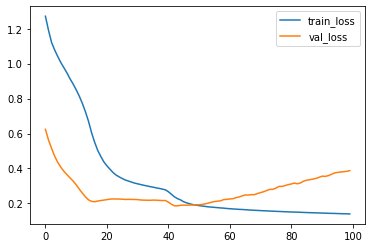

In [15]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [24]:
PREDICT_ROW = 5
predict_data = main_array[PREDICT_ROW, :].reshape(1, -1)
X_predict = predict_data[:, :-1]
y_true = predict_data[:, -1]
predict_data_scaled = xScaler.transform(X_predict)
y_pred_scaled = model.predict(predict_data_scaled)
y_pred = yScaler.inverse_transform(y_pred_scaled)
print("Prediction price result: {}".format(float(y_pred)))
print("True price: {}".format(float(y_true)))
print("Percentage error: {}".format(str(float(abs(y_true - y_pred) * 100 / y_true))))



1/1 [==============================] - 0s 20ms/step
Prediction price result: 14331.158203125
True price: 15250.0
Percentage error: 6.025192110655738
